# How to Simplify Machine Learning Workflow with scikit-learn Pipeline

**Present to you by:** Siraprapa Watakit, Data Scientist, DACoE Asia
<br>**Duration** : 1 Hour

**Objective:** <font color=turguise> **Zero** to **Hero** Machine Learning with scikit-learn Pipeline.</font>

**Prerequisite:**  
- Basic python programming. 
- Basic understanding scikit-learn Estimator,Transformer API.
- Basic knowledge in machine learning workflow

<font color=darkred>  **Bonus:** lots of examples, and give aways functions and transformers. </font>

<i>This notebook is powered by <b>RISE</b>, best viewed in Slideshow mode</i>

**Agenda**
 - Background and Reviews : machine learning workflows, sklearn  Estimator,Transformer API.
 - Basic : Build a model with and without sklearn.Pipeline
 - Intermediate : Build your own Customer Transformer and Model Wrapper

**References**
 - Python Data Science Handbook
 - Kaggle competitor : Zac Stewart
 - PyData Conferences : **Julie Michelman** ,Kevin Goetsch
 - PyCon Conferences : **Kevin Markham**

# Background and Reviews

<img src="./images/ml_workflow.png" >



# Data

 - <code>numpy </code> : a 1D or 2D numeric arrays, accessible via slicing notation eg. <code>X[<i>start:stop:step</i>]</code> where start:stop:step are positional integer
 - <code>pandas</code> : a Dataframe with row & column labeled, can be accessed via slicing notation as well as column names <br> e.g. <code> house_data.loc[:10,['GrLivArea','YearBuilt','SalePrice']]</code>


# Preprocessing with Scikit-Learn’s Transformer API
1. instantiate a <code>transformer</code> object
2. <code>.fit</code> the <code>transformer</code> with train data
3. <code>.transform</code> on both training and test data

# Modeling with Scikit-Learn’s Estimator API
1. instantiate a <code>estimator</code> object
2. <code>.fit</code> the <code>estimator</code> with training data
3. Supervised vs. Unsupervised
    - Supervised <code>.predict</code> on test data
    - Unsupervised <code>.transform</code> on test data


# What happen when we invoke <code>.fit, .transform, .predict</code>
<br>
<img src="./images/fit_transform_predict.png" >


### <font color=darkred>  This is important, you need to understand it,<br> if you are to create your own Custom Transformer..</font>


## Example#1: Simple preprocessing and modeling

Data : House Price(<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">Kaggle</a>) 


In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

house_data = pd.read_csv('./data/house_data.csv')
house_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [45]:
from sklearn.model_selection import train_test_split

y = house_data['SalePrice']
X = house_data.loc[:,['GrLivArea','LotArea','Street']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.head(3)

,GrLivArea,LotArea,Street
135,1682,10400,Pave
1452,1072,3675,Pave
762,1547,8640,Pave


### Example #1: (1/4) Pre-process numeric features

In [46]:
from sklearn.preprocessing import StandardScaler

feat_num = ['GrLivArea','LotArea']

std_scaler = StandardScaler()
std_scaler.fit(X_train[feat_num])
X_train_num_scaled = std_scaler.transform(X_train[feat_num])
print("Scaled features:\n",X_train_num_scaled[0:3])


Scaled features:
 [[ 0.28783473 -0.03050433]
 [-0.86156463 -0.62436478]
 [ 0.03345946 -0.18592357]]


### Example #1: (2/4)  Pre-process categorical features


In [47]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

feat_cat = ['Street']

le = LabelEncoder()
X_train[feat_cat] = le.fit_transform(X_train[feat_cat])
ohe = OneHotEncoder(categorical_features = [0])
X_train_cat_ohe = ohe.fit_transform(X_train[feat_cat]).toarray()

print("Dummified features:\n",X_train_cat_ohe[0:3])


Dummified features:
 [[0. 1.]
 [0. 1.]
 [0. 1.]]


### This is only one of many ways to to stuffs with python!

Check this out : <a href="https://www.youtube.com/watch?v=0s_1IsROgDc">How do I create dummy variables in pandas?</a>

<font color=darkred> NOTE: sklearn library takes care of dummy variable trap; hence even if you don't drop one of the columns, it is still going to work. However we should make a habit of taking care of dummy variable trap by ourselves. Just in case you are not using sklearn for modeling</font>

### Example#1: (3/4) Build a model(s)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_processed = np.concatenate((X_train_num_scaled, X_train_cat_ohe), axis=1)

print("Processed Train Data: \n",X_train_processed[0:3],"\n")
lr1 = LinearRegression()
lr1.fit(X_train_num_scaled,y_train)
print("Model #1 :  Only 2 numeric features")
print("Intercept:", lr1.intercept_)
print("Coefficient:", lr1.coef_)

lr2 = LinearRegression()
lr2.fit(X_train_processed,y_train)
print("\nModel #2 : 2 numeric and 1 categorical features")
print("Intercept:", lr2.intercept_)
print("Coefficient:", lr2.coef_)



Processed Train Data: 
 [[ 0.28783473 -0.03050433  0.          1.        ]
 [-0.86156463 -0.62436478  0.          1.        ]
 [ 0.03345946 -0.18592357  0.          1.        ]] 

Model #1 :  Only 2 numeric features
Intercept: 181312.6927592955
Coefficient: [51684.07165803  6784.0654669 ]

Model #2 : 2 numeric and 1 categorical features
Intercept: 170938.21916857865
Coefficient: [ 51546.81052379   7140.27164994 -10456.32348098  10456.32348098]


### Example #1: (4/4) Pre-process the test data, then test and compare the model(s)

Be careful with this part..
- Use the estimator/transformer that were fitted with the <font color=darkred>**TRAIN DATA**</font>
    - Estomators: <code>lr1,lr2</code>
    - Transformer: <code>std_scaler,le,ohe</code>
    - Do not fit! - just tranform!
- Apply estimator/transformer with the <font color=blue>**TEST DATA** </font>


In [49]:
X_test_num_scaled = std_scaler.transform(X_test[feat_num])
X_test[feat_cat] = le.transform(X_test[feat_cat])         
X_test_cat_ohe = ohe.transform(X_test[feat_cat]).toarray()
X_test_processed = np.concatenate((X_test_num_scaled, X_test_cat_ohe), axis=1)

print("Processed Test Data: \n",X_test_processed[0:3],"\n")

y_pred = lr1.predict(X_test_num_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Model #1 :  Only 2 numeric features")
print('The RMSE value is {:.4f}'.format(rmse))

y_pred = lr2.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nnModel #2 : 2 numeric and 1 categorical features")
print('The RMSE value is {:.4f}'.format(rmse))


Processed Test Data: 
 [[-0.86910167 -0.20588081  0.          1.        ]
 [ 2.05904031  0.13339233  0.          1.        ]
 [-0.94447212 -0.15766552  0.          1.        ]] 

Model #1 :  Only 2 numeric features
The RMSE value is 55729.6255

nModel #2 : 2 numeric and 1 categorical features
The RMSE value is 55640.0761


# Do more with Pipeline

### What is Pipeline
- Pipeline is a container of steps / sequences of actions : <b><font color=darkred>list of tuples</font></b>
- What can be in the <b><font color=darkred>list of tuples</font></b>
    - <code>Transformer</code>
    - <code>Estimator</code>
    - <code>FeatureUnion</code>
    - more <code>Pipeline</code> !


# Building Blocks of scikit-learn Pipeline 
<br>
<img src="./images/block_of_legos.png" >

- Imagine each Transformer and Estimator is a piece of Lego, <code>Pipeline</code> make it possible to chain one block to another, <br><i><b>sending output of <code>block#1</code> as an input of<code>block#2</code></b></i>
- <code>FeatureUnion</code> make it possible to aggregate output from multiple <code>Pipeline</code>



### <font color=darkred> Important Note </font>
- Each block must have  <code>.fit, .transform </code> implemented
- To create your own Customer Transformer, you need to inherit <code>BaseEstimator,TransformerMixin </code>
    - <code>BaseEstimator</code> gives your transformer the <code>.fit_transform</code> method, for free.
    - <code>TransformerMixin</code> gives your transformer grid-searchable parameters. 

In [50]:
from sklearn.base import TransformerMixin, BaseEstimator
class MyTransformer(TransformerMixin, BaseEstimator):
    '''A template for a custom transformer.'''

    def __init__(self):
        # this is where you can init internal variable
        pass

    def fit(self, X, y=None):
        # this is what happend when .fit is invoked
        return self

    def transform(self, X):
        # this is what happend when .tranform is invoked
        return X

### Example #2: Pipeline with <code> Transformer - StandandSacler</code>

<img src="./images/ex2.png" >

In [51]:
from sklearn.pipeline import Pipeline

num_pipe = Pipeline([('std_scaler',StandardScaler())])
num_pipe.fit(X_train[feat_num])

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

### <font color=darkred> One line transform !! </font>

In [52]:
X_test_num_scaled_new = num_pipe.transform(X_test[feat_num])

In [53]:
#This is the exact number shown in Example #1
print("Processed Test Data - numeric feature:\n",X_test_num_scaled_new[0:3])

Processed Test Data - numeric feature:
 [[-0.86910167 -0.20588081]
 [ 2.05904031  0.13339233]
 [-0.94447212 -0.15766552]]


### Example #3: Pipeline with <code> Transformer - Imputer and MinMaxScaler</code>

<img src="./images/ex3.png" >

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipe = Pipeline([('impute',SimpleImputer(strategy='median')),
                     ('minmax_scaler',MinMaxScaler())])
num_pipe.fit(X_train[feat_num])

Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('minmax_scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))])

### <font color=darkred> One line transform !! </font>

In [55]:
X_test_num_scaled_new = num_pipe.transform(X_test[feat_num])

In [56]:
print("Processed Test Data - numeric feature:\n",X_test_num_scaled_new[0:3])

Processed Test Data - numeric feature:
 [[0.13828184 0.03325154]
 [0.43104748 0.05120942]
 [0.13074604 0.03580359]]


### Example #4: Pipeline with <code> Transformer - StandardScaler , Estimator - LinearRegression</code>

<img src="./images/ex4.png" >

In [57]:
num_pipe_model = Pipeline([('std_scaler',StandardScaler()),
                           ('lr',LinearRegression())])
num_pipe_model.fit(X_train[feat_num],y_train)

print("Model #1 :  Only 2 numeric features")
print("Intercept:",num_pipe_model.named_steps['lr'].intercept_)
print("Coefficient:", num_pipe_model.named_steps['lr'].coef_)

Model #1 :  Only 2 numeric features
Intercept: 181312.6927592955
Coefficient: [51684.07165803  6784.0654669 ]


### <font color=darkred> One line predict !! </font>
- When <code>.predict</code> of a Pipeline is invoked, <code>Pipeline</code> will invoke a chain of <code>.transform</code>, from the top; followed by <code>.predict</code> of the estimator  .

In [58]:
y_pred = num_pipe_model.predict(X_test[feat_num])

In [59]:
#This is the exact number shown in Example #1 - Model #1
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The RMSE value is {:.4f}'.format(rmse))

The RMSE value is 55729.6255


### Example #5: (1/3)Pipeline with <code>FeatureUnion and CustomTransformer</code>
- Let's make it more dynamic, let's suppose we would like to select **any features for any transformers**
- First, we define <code>MyFeatureExtractor</code>. 

In [60]:
#Let's dictate what's going to happend when an object is instanciated, fit, transform
class MyFeatureExtractor(TransformerMixin, BaseEstimator):
    '''This customer tranformer extracts and returns specific feature.'''

    def __init__(self,feature):
        # init feature to extract
        self.feature = feature

    def fit(self, X, y=None):
        # do nothing
        return self

    def transform(self, X):
        # return a sub-seleted feature
        return X[self.feature]

### Example #5: (2/3) Configure columns to extract
- <b>For flexibility reason</b>, it is recommended that you have a seperated configuration, apart from <code>Pipeline</code> construction. 
- Let's define feature to select, here..

In [61]:
COLS_1 = ['GrLivArea','LotArea','YearBuilt']
COLS_2 = ['OverallQual','OverallCond']

### Example #5: (3/3) Construct a FeatureUnion Pipeline
- Let's suppose we would like to..
    - Standize <code>GrLivArea,LotArea,YearBuilt</code>
    - MinMaxStandize <code>OverallQual,OverallCond</code>
- Like Pipeline, FeatureUnion accepts <b><font color=darkred>list of tuples</font></b>

In [62]:
from sklearn.pipeline import FeatureUnion
my_pipelines = FeatureUnion([('std',Pipeline([('cols1',MyFeatureExtractor(COLS_1)),
                                              ('std',StandardScaler() )])  ),
                             ('minmax',Pipeline([('cols2',MyFeatureExtractor(COLS_2)),
                                                 ('minmax',MinMaxScaler() )]))])

my_pipelines.fit(house_data)
output = my_pipelines.transform(house_data)

In [63]:
print(output[0:3])

[[ 0.37033344 -0.20714171  1.05099379  0.66666667  0.5       ]
 [-0.48251191 -0.09188637  0.15673371  0.55555556  0.875     ]
 [ 0.51501256  0.07347998  0.9847523   0.66666667  0.5       ]]


### Example #6: Pipeline with <code>FeatureUnion + CustomTransformer + Estimator(Unsupervised)</code>
- Note: Using whole dataset(house_data) for convenient

In [64]:
from sklearn.decomposition import PCA
my_pipelines = Pipeline([('all_features',FeatureUnion([('std',Pipeline([('cols1',MyFeatureExtractor(COLS_1)),
                                                                        ('std',StandardScaler() )])  ),
                                                       ('minmax',Pipeline([('cols2',MyFeatureExtractor(COLS_2)),
                                                                           ('minmax',MinMaxScaler() )]))])),
                        ('pca',PCA(n_components=1))])
my_pipelines.fit(house_data)
output = my_pipelines.transform(house_data)

<img src="./images/ex6.png" >

In [65]:
print(output[0:3])

[[ 0.62524055]
 [-0.32548857]
 [ 0.85136376]]


### Example #7: Pipeline with <code>FeatureUnion + CustomTransformer + Estimator(Supervised)</code>
- Note: Using whole dataset(house_data) for convenient

In [66]:
my_pipelines = Pipeline([('all_features',FeatureUnion([('std',Pipeline([('cols1',MyFeatureExtractor(COLS_1)),
                                                                        ('std',StandardScaler() )])  ),
                                                       ('minmax',Pipeline([('cols2',MyFeatureExtractor(COLS_2)),
                                                                           ('minmax',MinMaxScaler() )]))])),
                        ('lr',LinearRegression())])

my_pipelines.fit(house_data,house_data['SalePrice'])

print("Intercept:",my_pipelines.named_steps['lr'].intercept_)
print("Coefficient:", my_pipelines.named_steps['lr'].coef_)

output = my_pipelines.predict(house_data)

Intercept: 30700.076578751265
Coefficient: [ 30767.04070259   9069.20690688  18380.68579621 219207.66268174
  45496.2686746 ]


<img src="./images/ex7.png" >

In [67]:
price_compare = pd.concat([house_data['SalePrice'],pd.DataFrame(output)],axis=1)
price_compare.columns = ['SalePrice','Predicted']

print(price_compare.head())
rmse = np.sqrt(mean_squared_error(price_compare['SalePrice'], price_compare['Predicted']))
print('\nThe RMSE value is {:.4f}'.format(rmse))

   SalePrice      Predicted
0     208500  228420.092302
1     181500  179493.419346
2     223500  234198.892926
3     140000  176257.098269
4     250000  284813.404491

The RMSE value is 39318.4604


### Example #8: Pipeline with <code>FeatureUnion + CustomTransformer + Estimator(Supervised) + GridSearch</code>
- Let's do GridSearch with Ridge Regression
- Note: Using whole dataset(house_data) for convenient

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

my_pipelines = Pipeline([('all_features',FeatureUnion([('std',Pipeline([('cols1',MyFeatureExtractor(COLS_1)),
                                                                        ('std',StandardScaler() )])  ),
                                                       ('minmax',Pipeline([('cols2',MyFeatureExtractor(COLS_2)),
                                                                           ('minmax',MinMaxScaler() )]))])),
                        ('ridge',Ridge())])

params = {'ridge__alpha': [1,0.1,0.01,0.001,0.0001,0]}
grid = GridSearchCV(estimator=my_pipelines, param_grid=params)

grid.fit(house_data,house_data['SalePrice'].values)
print(grid.best_params_)

{'ridge__alpha': 0.01}


### Example #9: Finally, publish your model 
- Note: Using whole dataset(house_data) for convenient

In [69]:
#Build the final model

my_pipelines = Pipeline([('all_features',FeatureUnion([('std',Pipeline([('cols1',MyFeatureExtractor(COLS_1)),
                                                                        ('std',StandardScaler() )])  ),
                                                       ('minmax',Pipeline([('cols2',MyFeatureExtractor(COLS_2)),
                                                                           ('minmax',MinMaxScaler() )]))])),
                        ('ridge',Ridge(alpha=0.01))])
my_pipelines.fit(house_data,house_data['SalePrice'])

from sklearn.externals import joblib
#Save file to disk
joblib.dump(my_pipelines, './output/final_pipelines.sav')

['./output/final_pipelines.sav']

### Let's test it - with a completely new data

In [70]:
house_test = pd.read_csv('./data/house_test.csv')
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [71]:
loaded_pipelines = joblib.load('./output/final_pipelines.sav')
predicted_prices = loaded_pipelines.predict(house_test)
pd.DataFrame(predicted_prices).head()

,0
0,115033.435059
1,165320.358111
2,176229.219949
3,201900.447941
4,217735.024974


# Check-in

- So far, we see the the ouput of Pipeline are in <code>numpy</code> format, what if we would like to stay in <code>pandas</code> land?
- There isn't an example of <code>Pipeline[('le',LabelEncoder),('ohe',OneHotEncoder())]</code> here? <a href="https://github.com/scikit-learn/scikit-learn/issues/3956">issues#3956</a>


# Solution to this - Custom Transformer, but let's not reinvent the wheels

**Julie Michelman** - <a href="https://www.youtube.com/watch?v=BFaadIqWlAg">PyCon 2016</a>

Available Customer Transformers
- DFImputer
- DFStandardScaler
- ZeroFillTransformer
- Log1pTransformer
- DateFormatter
- DummyTransformer
- MultiEncoder

<b><i><font color=darkred>and lots more..<font></i></b>



### Example #10:  Custom Transformers - DataFrame
- First, let's take a look at mockup data

In [72]:
mockup = pd.read_csv('./data/mockup_data.csv')
mockup.head()

,Target,R1,R2,R3,R4,Sex,SABal,CCBal,INVBal,Color
0,0,1,1,0,1,F,99.706895,82.059339,452159,Red
1,0,0,1,0,0,M,29.143155,1.603093,309673,Blue
2,1,1,1,0,0,F,42.776849,72.755967,758389,Green
3,1,0,1,1,1,F,37.503063,86.014612,322604,Green
4,1,0,0,0,0,F,4.271746,92.688772,315713,Red


### Let's check missing values

In [73]:
mockup.isnull().sum()

Target    0
R1        0
R2        0
R3        0
R4        0
Sex       0
SABal     3
CCBal     3
INVBal    0
Color     0
dtype: int64

### From what I saw above, here is what I would like to do
- For categorical variables <code>Sex, Color</code>, create dummies
- For numerric variables <code>SABal, CCBal,INVBal</code>, fill missing values with zeros and then take log1p
- <font color=darkred><b>For business rules variable, do RIDITS transformation - Bross(1958)</b></font>

Then, let's configure parameters here

In [74]:
feat_rules= ['R1','R2','R3','R4']
feat_cats = ['Sex','Color']
feat_nums = ['SABal','CCBal','INVBal']

### Define a special transformer - RiditsTransformer
- Please visit <a href="https://analytics.knowledgehub.ageas.com/posts/2005000-sas-python-by-example-anomaly-detection-with-pridit">Knowledge Hub</a> for detailed explanation 


Or have a quick look at <a href="https://nbviewer.jupyter.org/github/swatakit/Python-Tools/blob/master/Anomaly%20Detection%20with%20PRIDIT%20-%20Python.ipynb">RIDITS- Python</a>



In [75]:
class RiditsTransformer(TransformerMixin, BaseEstimator):
    """RIDITS tramsformation - Bross(1958)"""

    def __init__(self):
        #initialie dictionaries
        self.dict_ridits_1 = {}
        self.dict_ridits_0 = {}
        pass
        
    def fit(self, X, y=None):
        #for each feature,build rules
        Xr =pd.DataFrame(X)
        rules = Xr.columns
        for rule in rules:
            try:
                r = Xr[rule].value_counts()
                p_1 = r[1]/np.sum(r)
                p_0 = r[0]/np.sum(r)
                ridit_1 = (0.5 * p_1)
                ridit_0 = (p_1+0.5*p_0)
                self.dict_ridits_1.update({str(rule):ridit_1})
                self.dict_ridits_0.update({str(rule):ridit_0})

            except:
                pass
        
        return self

    def transform(self, X):
        # transform X with fitted dictionary
        Xr =pd.DataFrame(X)
        rules = Xr.columns
        for rule in rules:
            try:
                #replace 0,1 with ridits
                if str(rule) in self.dict_ridits_1.keys():
                    ridit_1 = self.dict_ridits_1.get(str(rule))
                    ridit_0 = self.dict_ridits_0.get(str(rule))
                    Xr[rule]=Xr[rule].map({1:ridit_1,0:ridit_0})
            except :
                pass

        return Xr
    

In [76]:
from custom_transformers import (ColumnExtractor, DFStandardScaler, DFFeatureUnion, 
                                 DFImputer,DummyTransformer,ZeroFillTransformer,Log1pTransformer)

pipeline = Pipeline([
    ('features', DFFeatureUnion([
        ('categoricals', Pipeline([
            ('extract', ColumnExtractor(feat_cats)),
            ('dummy', DummyTransformer())
        ])),
        ('numerics', Pipeline([
            ('extract', ColumnExtractor(feat_nums)),
            ('zero_fill', ZeroFillTransformer()),
            ('log', Log1pTransformer())
        ])),
        ('ridits', Pipeline([
            ('extract', ColumnExtractor(feat_rules)),
            ('ridits', RiditsTransformer())
        ]))
    ]))
])

In [77]:
pipeline.fit(mockup)
mockup_trans = pipeline.transform(mockup)
mockup_trans.head()

,Color=Amber,Color=Blue,Color=Green,Color=Red,Sex=F,Sex=M,SABal,CCBal,INVBal,R1,R2,R3,R4
0,0.0,0.0,0.0,1.0,1.0,0.0,4.612214,4.419555,13.021791,0.166667,0.216667,0.683333,0.233333
1,0.0,1.0,0.0,0.0,0.0,1.0,3.405958,0.956700,12.643275,0.666667,0.216667,0.683333,0.733333
2,0.0,0.0,1.0,0.0,1.0,0.0,3.779105,4.300762,13.538953,0.166667,0.216667,0.683333,0.733333
3,0.0,0.0,1.0,0.0,1.0,0.0,3.650738,4.466076,12.684184,0.666667,0.216667,0.183333,0.233333
4,0.0,0.0,0.0,1.0,1.0,0.0,1.662362,4.539978,12.662592,0.666667,0.716667,0.683333,0.733333


### Now, let suppose we have acquired new data
- <b><font color=#FF00FF>Take notice on the last observation</font></b>

In [78]:
mockup_new = pd.read_csv('./data/mockup_new.csv')
mockup_new

,R1,R2,R3,R4,Sex,SABal,CCBal,INVBal,Color
0,1,1,0,1,F,99.706895,82.059339,452159,Red
1,0,1,0,0,M,29.143155,1.603093,309673,Blue
2,1,1,0,0,F,42.776849,72.755967,758389,Green
3,1,0,0,1,F,43.430000,23.034000,234234,Pink


In [79]:
mockup_new_trans = pipeline.transform(mockup_new)
mockup_new_trans

,Color=Amber,Color=Blue,Color=Green,Color=Red,Sex=F,Sex=M,SABal,CCBal,INVBal,R1,R2,R3,R4
0,0.0,0.0,0.0,1.0,1.0,0.0,4.612214,4.419555,13.021791,0.166667,0.216667,0.683333,0.233333
1,0.0,1.0,0.0,0.0,0.0,1.0,3.405958,0.956700,12.643275,0.666667,0.216667,0.683333,0.733333
2,0.0,0.0,1.0,0.0,1.0,0.0,3.779105,4.300762,13.538953,0.166667,0.216667,0.683333,0.733333
3,0.0,0.0,0.0,0.0,1.0,0.0,3.793915,3.179469,12.364080,0.166667,0.716667,0.683333,0.233333


### Example #11:  Custom Transformers - DataFrame + Logistic Regression(<code>.predict</code>)
- Let's add Logistic regression into it
- Again, using the whole sample(mockup) just for convenient

In [80]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = Pipeline([
    ('features', DFFeatureUnion([
        ('categoricals', Pipeline([
            ('extract', ColumnExtractor(feat_cats)),
            ('dummy', DummyTransformer())
        ])),
        ('numerics', Pipeline([
            ('extract', ColumnExtractor(feat_nums)),
            ('zero_fill', ZeroFillTransformer()),
            ('log', Log1pTransformer())
        ])),
        ('ridits', Pipeline([
            ('extract', ColumnExtractor(feat_rules)),
            ('ridits', RiditsTransformer())
        ]))
    ])),
    ('logreg',LogisticRegression(solver='liblinear'))
])

In [81]:
pipeline_logreg.fit(mockup,mockup['Target'])
y_pred = pipeline_logreg.predict(mockup)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Example #12:  Custom Transformers - DataFrame + Logistic Regression(<code>.predict_proba</code>)
- Suppose, we would like to have probability, instead of 0,1
- We need to improvise by having a model wrapper

In [82]:
class ModelTransformer(TransformerMixin, BaseEstimator):
    '''model.predict_proba'''

    def __init__(self,model):
        self.model = model

    def fit(self,*args, **kwargs):
        #expecting X, and y
        self.model.fit(*args, **kwargs)
        return self

    def transform(self,X,**transform_params):
        return pd.DataFrame(self.model.predict_proba(X))

In [83]:
pipeline_logreg_proba = Pipeline([
    ('features', DFFeatureUnion([
        ('categoricals', Pipeline([
            ('extract', ColumnExtractor(feat_cats)),
            ('dummy', DummyTransformer())
        ])),
        ('numerics', Pipeline([
            ('extract', ColumnExtractor(feat_nums)),
            ('zero_fill', ZeroFillTransformer()),
            ('log', Log1pTransformer())
        ])),
        ('ridits', Pipeline([
            ('extract', ColumnExtractor(feat_rules)),
            ('ridits', RiditsTransformer())
        ]))
    ])),
    ('logreg',ModelTransformer(LogisticRegression(solver='liblinear')))
])

In [84]:
pipeline_logreg_proba.fit(mockup,mockup['Target'])
y_pred_proba = pipeline_logreg_proba.transform(mockup)
y_pred_proba.head()

,0,1
0,0.531571,0.468429
1,0.798716,0.201284
2,0.584693,0.415307
3,0.568776,0.431224
4,0.429483,0.570517


# <font color=darkred>Bonus: A complete 2-class classification report</font>

In [85]:
y = mockup['Target']
X = mockup_trans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Accuracy:66.67%
Precision:50.00%
Recall:50.00%
Fscore:50.00%
Average precision:41.67%


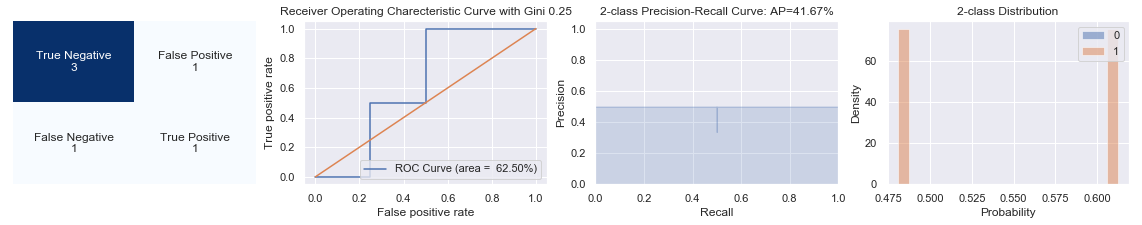

In [87]:
from custom_functions import print_classification_performance2class_report

acc,pc,rc,fs,ap,roc_auc,gini = print_classification_performance2class_report(model,X_test,y_test)

The metrics can be put all together, for model comparison - <a href="https://nbviewer.jupyter.org/github/swatakit/The-public-and-private-life-of-Big-Data/blob/master/StockSentimentIndex.ipynb"> Example</a>

<img src="./images/ml_workflow.png" >

# Conclusion, why Pipeline?

- Short, neat, clean codes
- Data Cleasing/Feature Engineering heaven! 
- Reusable, GridSearch-able, Serializable
- Easy to create your own customer transformers


<img src="./images/thankyou.png" >